#### Учебный проект в рамках профессии Data Science Яндекс Практикума

##   Анализ прибыльности тарифных планов "Смарт" и "Ультра"

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

Детали о тарифах:

**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей 
 
**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

### Шаг 1. Откроем файлы с данными и изучим общую информацию


In [1]:
import math
import pandas as pd 
import matplotlib as plt 
import matplotlib.pyplot as plot 
import numpy as np
import seaborn as sns

from scipy import stats as st
from math import factorial
 
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [2]:
print('- - - Данные о звонках - - -')
print(' ')
print(calls.head(5))
print(' ')
print(calls.info())
print(' ')
print(calls.describe())

- - - Данные о звонках - - -
 
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
 
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max     

Таблица calls (информация о звонках): 

* id — уникальный номер звонка 
* call_date — дата звонка --> **переводим в date time**
* duration — длительность звонка в минутах  --> **секунды округляем до минут в пользу телекоммуникационной компании** 
* user_id — идентификатор пользователя, сделавшего звонок

In [3]:
print('- - - Данные об интернете - - -')
print(' ')
print(internet.head(5))
print(' ')
print(internet.info())
print(' ')
print(internet.describe())

- - - Данные об интернете - - -
 
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
 
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std   

Таблица internet (информация об интернет-сессиях): 

* id — уникальный номер сессии 
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах) --> **добавляем данные в гигабайтах**
* session_date — дата интернет-сессии --> **переводим в date time**
* user_id — идентификатор пользователя

In [4]:
print('- - - Данные о сообщениях - - - ')
print(' ')
print(messages.head(5))
print(' ')
print(messages.info())
print(' ')
print(messages.describe())

- - - Данные о сообщениях - - - 
 
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
 
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


Таблица messages (информация о сообщениях): 

* id — уникальный номер сообщения
* message_date — дата сообщения --> **переводим в date time**
* user_id — идентификатор пользователя, отправившего сообщение

In [5]:
print('- - - Данные о тарифах - - - ')
print(' ')
print(tariffs.head())
print(' ')
print(tariffs.info())

- - - Данные о тарифах - - - 
 
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         

Таблица tariffs (информация о тарифах): 

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [7]:
print('- - - Данные о пользователях - - - ')
print(' ')
print(users.head(5))
print(' ')
print(users.info())

- - - Данные о пользователях - - - 
 
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Таблица users (информация о пользователях): 

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

#### Промежуточные выводы 

В целом для анализа у нас довольно хорошие данные - телекоммуникационные компании точно знают сколько звонков, смс и выходов в интернет осуществляют их пользователи. Нужны небольшие правки - округлить минуты так, чтобы они отображали политику компании, мегабайты перевести в гигабайты и также округлить в пользу Мегалайна, а также перевести даты в нужный нам формат datetime.    
 
Плохо обстоят дела с данными churn_date (дата прекращения пользования тарифом), но у нас недостаточно данных для восстановления этих строк и они, как кажется на этой стадии, не очень нужны для анализа, поэтому оставим их в таком же виде.  

### Шаг 2. Подготовка данных 

* Приведем данные к нужным типам;
* Найдем и исправим ошибки в данных.

In [6]:
#  Приводим даты в формат datetime


calls['call_date']= pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

#  Округляем минуты и заменяем нулевые значения одной минутой

calls['round_minutes'] = np.ceil(calls['duration']).astype(int)
calls['round_minutes'] = calls['round_minutes'].replace(0, 1).astype(int)

#  Переводим Мб в Гб и заменяем нулевые значения одной минутой

internet['gb_used'] = internet['mb_used'] / 1024
internet['gb_used'] = np.ceil(internet['gb_used']).astype(int)
internet['gb_used'] = internet['gb_used'].replace(0, 1).astype(int)

#  Переводим Мб в ГБи в тарифах

tariffs["gb_per_month_included"] = (tariffs["mb_per_month_included"] / 1024).astype(int)


In [7]:
# Проверим есть ли аномальные выбросы на замену, дубликаты

#sns.distplot(calls['duration'], kde = False)
#sns.distplot(internet['mb_used'], kde = False) 

users['name_surname'] = users['first_name'] + ' ' + users['last_name']
print('Дубликатов среди пользователей: ', users['name_surname'].duplicated().sum())

Дубликатов среди пользователей:  0


#### Промежуточные выводы 

Аномальных выбросов не нашли (кроме нулевых значений), дубликатов среди пользователей тоже. Нулевые значения могут объясняться как ошибочными звонками, так и очень короткими звонками, например, когда кто-то пытается дозвониться, но у него прерывается связь. Данные, которые нуждались в обработке, перевели в нужные форматы, теперь дата сет можно анализировать.

**Посчитаем для каждого пользователя:** 

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [8]:
#  Выделим месяца

calls['months'] = calls['call_date'].dt.month
internet['months'] = internet['session_date'].dt.month
messages['months'] = messages['message_date'].dt.month
users['months'] = users['reg_date'].dt.month

# Считаем количество сделанных звонков и израсходованных минут разговора по месяцам

#print(calls.groupby('months').count())
#print(calls.groupby('months').sum())

print('')
print('Получим количество звонков и сумму минут по месяцам.')
calls_by_months = calls.pivot_table(index='months', values='round_minutes', aggfunc= {'sum','count'})
print(calls_by_months)
      
# Считаем количество отправленных сообщений по месяцам
print(' ')
print('Получим количество отправленных сообщений по месяцам.')
messages_by_months = messages.pivot_table(index='months', values='id', aggfunc= 'count')
print(messages_by_months)

# Считаем объем израсходованного интернет-трафика по месяцам;

print(' ')
print('Получим объем трафика по месяцам.')
internet_by_months = internet.pivot_table(index='months', values='gb_used', aggfunc= 'sum')
print(internet_by_months)

# Посмотрим, как число количество пользователей, является ли рост просто следствием роста общего массива клиентов? 

print(' ')
print('Посмотрим на количество пользователей по месяцам.')
users_by_months = users.pivot_table(index='months', values='user_id', aggfunc= 'count')
print(users_by_months)


Получим количество звонков и сумму минут по месяцам.
        count     sum
months               
1        1476   11096
2        3328   25078
3        6687   49455
4        9272   68078
5       12647   91341
6       14716  108063
7       18298  135264
8       21488  157929
9       24061  178090
10      27146  199317
11      29501  215926
12      33987  250277
 
Получим количество отправленных сообщений по месяцам.
           id
months       
1         924
2        1924
3        3648
4        5179
5        7298
6        8983
7       11320
8       13088
9       14759
10      17114
11      18244
12      20555
 
Получим объем трафика по месяцам.
        gb_used
months         
1          1129
2          2678
3          4960
4          6621
5          9566
6         11260
7         13772
8         16360
9         17765
10        20325
11        22144
12        25160
 
Посмотрим на количество пользователей по месяцам.
        user_id
months         
1            43
2            39
3         

In [9]:
# Объединим данные по использованным минутам, смс и пакетам траффика в одну таблицу

calls_gr = calls.groupby(['user_id', 'months'])['round_minutes'].sum()
calls_gr = calls_gr.reset_index(level = 'months')

sms_gr = messages.groupby(['user_id', 'months'])['id'].count()
sms_gr = sms_gr.reset_index(level = 'months')

internet_gr = internet.groupby(['user_id', 'months'])['gb_used'].sum()
internet_gr = internet_gr.reset_index(level = 'months')

calls_sms = calls_gr.merge(sms_gr, on = ['user_id', 'months'])
calls_sms_internet = calls_sms.merge(internet_gr, on = ['user_id', 'months'])
calls_sms_internet_users = calls_sms_internet.merge(users, on = 'user_id')
del calls_sms_internet_users['months_y']

print(calls_sms_internet_users.head(5))

# Составим функцию для подсчета выручки

def calculate_tariff(row):
    
    if row['tariff'] == 'ultra':
        
        ultra_calls_revenue = max((row['round_minutes'] - tariffs['minutes_included'][1]), 0) * 1 
        ultra_sms_revenue =  max((row['id'] - tariffs['messages_included'][1]), 0) * 1
        ultra_internet_revenue =  max((row['gb_used'] - tariffs["gb_per_month_included"][1]), 0) * 1
        ultra_connection_fee = 1950
        
        ultra_calculation = ultra_sms_revenue + ultra_calls_revenue + ultra_internet_revenue + ultra_connection_fee
        
        return  ultra_calculation
    
    else:
        
        smart_calls_revenue = max((row['round_minutes'] - tariffs['minutes_included'][0]), 0) * 3
        smart_sms_revenue = max((row['id'] - tariffs['messages_included'][0]), 0) * 3
        smart_internet_revenue = max((row['gb_used'] - tariffs["gb_per_month_included"][0]), 0)  * 3
        smart_connection_fee = 550
        
        smart_calculation =  smart_sms_revenue + smart_calls_revenue + smart_internet_revenue + smart_connection_fee
            
        return  smart_calculation
    
calls_sms_internet_users['revenue'] = calls_sms_internet_users.apply(calculate_tariff, axis = 1)

print('- - -')
calls_sms_internet_users.head(15)

   user_id  months_x  round_minutes  id  gb_used  age churn_date       city  \
0     1000         5            164  22        5   52        NaN  Краснодар   
1     1000         6            187  60       54   52        NaN  Краснодар   
2     1000         7            346  75       29   52        NaN  Краснодар   
3     1000         8            418  81       29   52        NaN  Краснодар   
4     1000         9            478  57       28   52        NaN  Краснодар   

  first_name  last_name   reg_date tariff      name_surname  
0     Рафаил  Верещагин 2018-05-25  ultra  Рафаил Верещагин  
1     Рафаил  Верещагин 2018-05-25  ultra  Рафаил Верещагин  
2     Рафаил  Верещагин 2018-05-25  ultra  Рафаил Верещагин  
3     Рафаил  Верещагин 2018-05-25  ultra  Рафаил Верещагин  
4     Рафаил  Верещагин 2018-05-25  ultra  Рафаил Верещагин  
- - -


,user_id,months_x,round_minutes,id,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,name_surname,revenue
0,1000,5,164,22,5,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
1,1000,6,187,60,54,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1974
2,1000,7,346,75,29,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
3,1000,8,418,81,29,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
4,1000,9,478,57,28,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
5,1000,10,363,73,28,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
6,1000,11,344,58,28,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
7,1000,12,341,70,21,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1950
8,1002,6,118,4,34,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Евгений Абрамович,607
9,1002,7,219,11,59,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Евгений Абрамович,682


#### Промежуточные выводы 

Если проанализировать данные, которые мы получили в разбивке по месяцам, мы наблюдаем рост продолжительности звонков в 2 раза. Однако более впечатляет рост отправленных смс и интернет траффика, оба выросли больше, чем в 22 раза. Смс при этом, стоит намного дешевле 1 гб интернета, поэтому явно следует сосредоточиться на развитии этого направления.  

Первой мыслью будет подумать, что рост был обеспечен количеством клиентов, но это отнюдь не так: их количество даже уменьшилось, они просто стали активнее пользоваться разными услугами. Также не забываем, что мы анализируем данные за 2018 год - тогда было довольно благоприятное время для появления новых приложений, аутентификация в которых проходила как раз через смс-ки. Возможно, в этом кроется часть такого совпадения в цифрах. 

Не может не радовать, что мы получили подробную информацию с данными по выручке за каждый месяц по каждому клиенту. В датасете собрано много полезной информации, которую мы проанализируем далее.



### Шаг 3. Проанализируйте данные 

Опишем поведение клиентов оператора, исходя из выборки 

* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
* Посчитаем среднее количество, дисперсию и стандартное отклонение.  
* Построим гистограммы. Опишем распределения.

In [10]:
# Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

mean_minutes_for_ultra = int(calls_sms_internet_users.query('tariff == "ultra"')['round_minutes'].mean())
mean_minutes_for_smart = int(calls_sms_internet_users.query('tariff == "smart"')['round_minutes'].mean())

mean_sms_for_ultra = int(calls_sms_internet_users.query('tariff == "ultra"')['id'].mean())
mean_sms_for_smart = int(calls_sms_internet_users.query('tariff == "smart"')['id'].mean())

mean_internet_for_ultra = int((calls_sms_internet_users.query('tariff == "ultra"')['gb_used'].mean()) )
mean_internet_for_smart = int((calls_sms_internet_users.query('tariff == "smart"')['gb_used'].mean()) )

print("Среднее количество минут для тарифа Ultra:", mean_minutes_for_ultra)
print("Среднее количество минут для тарифа Smart:", mean_minutes_for_smart)
print('- - -')
print("Среднее количество sms для тарифа Ultra:", mean_sms_for_ultra)
print("Среднее количество sms для тарифа Smart:", mean_sms_for_smart)
print('- - -')
print("Среднее количество гигабайтов интернета для тарифа Ultra:", mean_internet_for_ultra)
print("Среднее количество гигабайтов интернета для тарифа Smart:", mean_internet_for_smart)


Среднее количество минут для тарифа Ultra: 571
Среднее количество минут для тарифа Smart: 432
- - -
Среднее количество sms для тарифа Ultra: 61
Среднее количество sms для тарифа Smart: 38
- - -
Среднее количество гигабайтов интернета для тарифа Ultra: 40
Среднее количество гигабайтов интернета для тарифа Smart: 50


In [11]:
# Посчитаем среднее количество, дисперсию и стандартное отклонение

p_ultra = calls_sms_internet_users.query('tariff == "ultra"')['user_id'].count() / len(calls_sms_internet_users)
p_smart = calls_sms_internet_users.query('tariff == "smart"')['user_id'].count() / len(calls_sms_internet_users) 

# 0.28 - p ultra, 0.72 - p smart

calls_weight_probs = {"571": 0.28, "432": 0.72}
sms_weight_probs = {"61": 0.28, "38": 0.72}
internet_weight_probs = {"40": 0.28, "50": 0.72}

calls_expectation = sum([int(x_i) * calls_weight_probs [x_i] for x_i in calls_weight_probs])
square_of_calls_expectation  = calls_expectation ** 2
expectation_of_calls_squares = sum(int(x_i)  * int(x_i) * calls_weight_probs [x_i] for x_i in calls_weight_probs)
calls_variance = expectation_of_calls_squares - square_of_calls_expectation
calls_sigma = math.sqrt(calls_variance)

print("Математическое ожидание звонков равно {} мин.".format(int(calls_expectation)))
print("Дисперсия звонков равна {} мин.".format(int(calls_variance)))
print("Стандартное отклонение звонков равно {} мин.".format(int(calls_sigma)))
print("- -")

sms_expectation = sum([int(x_i) * sms_weight_probs [x_i] for x_i in sms_weight_probs])
square_of_sms_expectation  = sms_expectation ** 2
expectation_of_sms_squares = sum(int(x_i)  * int(x_i) * sms_weight_probs [x_i] for x_i in sms_weight_probs)
sms_variance = expectation_of_sms_squares - square_of_sms_expectation
sms_sigma = math.sqrt(sms_variance)

print("Математическое ожидание sms равно {} сообщений".format(int(sms_expectation)))
print("Дисперсия sms равна {} сообщений".format(int(sms_variance)))
print("Стандартное отклонение sms равно {} сообщений".format(int(sms_sigma)))
print("- -")

internet_expectation = sum([int(x_i) * internet_weight_probs [x_i] for x_i in internet_weight_probs])
square_of_internet_expectation  = internet_expectation ** 2
expectation_of_internet_squares = sum(int(x_i)  * int(x_i) * internet_weight_probs [x_i] for x_i in internet_weight_probs)
internet_variance = expectation_of_internet_squares - square_of_internet_expectation
internet_sigma = math.sqrt(internet_variance)

print("Математическое ожидание интернета равно {} гб".format(int(internet_expectation)))
print("Дисперсия интернета равна {} гб".format(int(internet_variance)))
print("Стандартное отклонение интернета равно {} гб".format(int(internet_sigma)))
print("- -")

Математическое ожидание звонков равно 470 мин.
Дисперсия звонков равна 3895 мин.
Стандартное отклонение звонков равно 62 мин.
- -
Математическое ожидание sms равно 44 сообщений
Дисперсия sms равна 106 сообщений
Стандартное отклонение sms равно 10 сообщений
- -
Математическое ожидание интернета равно 47 гб
Дисперсия интернета равна 20 гб
Стандартное отклонение интернета равно 4 гб
- -


/Users/armineakhverdyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/armineakhverdyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


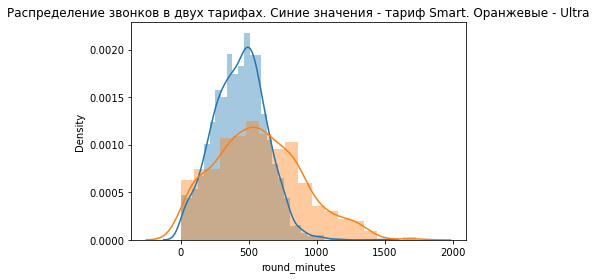

In [14]:
# Построим гистограммы. Опишем распределения

calls_smart = calls_sms_internet_users.query('tariff == "smart"')['round_minutes']
calls_ultra = calls_sms_internet_users.query('tariff == "ultra"')['round_minutes']
sns.distplot(calls_smart).set_title('Распределение звонков в двух тарифах. Синие значения - тариф Smart. Оранжевые - Ultra')
sns.distplot(calls_ultra)

<AxesSubplot:title={'center':'Распределение отправленных смс в двух тарифах. Синие значения - тариф Smart. Оранжевые - Ultra'}, xlabel='id'>

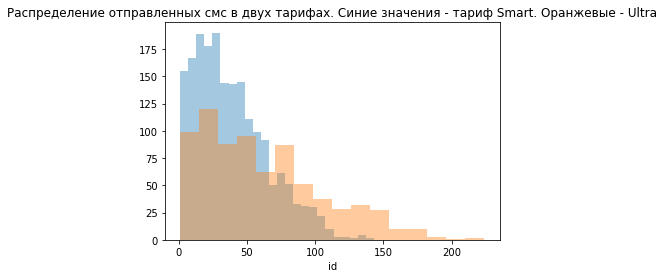

In [15]:
sms_smart = calls_sms_internet_users.query('tariff == "smart"')['id']
sms_ultra = calls_sms_internet_users.query('tariff == "ultra"')['id']
sns.distplot(sms_smart, kde = False).set_title('Распределение отправленных смс в двух тарифах. Синие значения - тариф Smart. Оранжевые - Ultra')
sns.distplot(sms_ultra, kde = False)

<AxesSubplot:title={'center':'Распределение интернет траффика в двух тарифах. Синие значения - тариф Smart. Оранжевые - Ultra'}, xlabel='gb_used', ylabel='Density'>

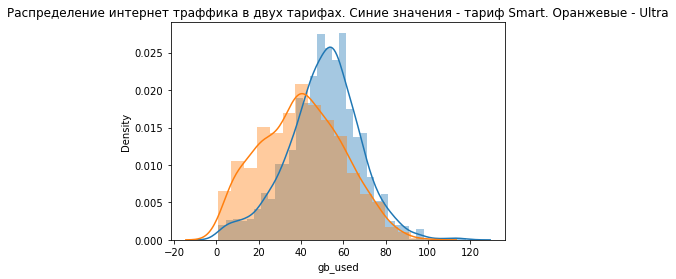

In [16]:
internet_smart = calls_sms_internet_users.query('tariff == "smart"')['gb_used']
internet_ultra = calls_sms_internet_users.query('tariff == "ultra"')['gb_used']
sns.distplot(internet_smart).set_title('Распределение интернет траффика в двух тарифах. Синие значения - тариф Smart. Оранжевые - Ultra')
sns.distplot(internet_ultra)

**Промежуточные выводы** 

На этой стадии нам нужно было ответить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

Наиболее вероятно, что в месяц человек будет осуществлять 470 минут разговора (+- 62 минуты), отправлять 44 сообщения (+- 10 сообщений) и использовать 47 гб интернета (+- 4 гб), эти цифры телекоммуникационная сеть должна обеспечить вне зависимоти от тарифа.  

Однако наша задача состоит в том, чтобы понять какие пакеты собрать для разных тарифов, чтобы приносить максимальную прибыль компании.  

Пользователи тарифа Ультра в среднем говорят 571 минуту (из 3000), отправляют 61 смс (из включенных в тариф 1000), используют 40 гб. траффика (из 30) и составляют меньшую часть клиентов компании (вероятность, что случайно выбранный клиент использует тариф Ультра - 28 %. 

Пользователи тарифа Смарт в среднем говорят 432 минуту (из 500), отправляют 38 смс (из 50), используют 50 гб. траффика (из 15) и составляют меньшую часть клиентов компании (вероятность, что случайно выбранный клиент использует тариф Смарт - 72 %). 

В обоих тарифах не полностью расходуются звонки и смс, а вот при использовании интернет-траффика практически все выходят за лимиты. Каждый "штрафной" гб для компании выгоднее в тарифе Ультра. Возможно, следует привлечь менеджеров тарифов, чтобы провести А/B тестирование или провести опрос в фокус-группе о том, насколько возможно повысить лимиты за каждый гб и в тарифе Смарт и сравнить будет ли отток на небольшой группе пользователей из-за повышенной цены.

Судя по графикам, пользователи тарифа Смарт также создают большую нагрузку на интернет-траффик: если рост будет держаться в таком же ритме, нужно будет проверять и готовность дата-центров, закупать необходимое оборудование и при необходимости влиять на спрос рублём.

### Шаг 4. Проверим гипотезы 

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; 

Пороговое значение alpha задайте самостоятельно. 

Поясним:

* как мы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

 ####  Промежуточные выводы

In [17]:
revenue_for_ultra = calls_sms_internet_users.query('tariff == "ultra"')['revenue']
revenue_for_smart = calls_sms_internet_users.query('tariff == "smart"')['revenue']

revenue_for_Moscow = calls_sms_internet_users.query('city == "Москва"')['revenue']
revenue_for_regions = calls_sms_internet_users.query('city != "Москва"')['revenue']

print("Средняя прибыль тарифа Ultra", revenue_for_ultra.mean())
print("Средняя прибыль тарифа Smart", revenue_for_smart.mean())
print("- - - ")
print("Средняя прибыль в Москве", revenue_for_Moscow.mean())
print("Средняя прибыль в регионах", revenue_for_regions.mean())
print("- - - ") 

# Поставим общепринятый стандартный уровень значимости 0.05

alpha = 0.05

results_1 = st.ttest_ind(revenue_for_ultra, revenue_for_smart, equal_var = False)
print('p-значение Ультра и Смарта', results_1.pvalue)


if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о том, что в тарифах Ультра и Смарт средняя выручка одинакова.")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что в тарифах Ультра и Смарт средняя выручка одинакова.")



Средняя прибыль тарифа Ultra 1964.0505319148936
Средняя прибыль тарифа Smart 819.8104438642298
- - - 
Средняя прибыль в Москве 1266.5682281059062
Средняя прибыль в регионах 1114.438419117647
- - - 
p-значение Ультра и Смарта 0.0
Отвергаем нулевую гипотезу о том, что в тарифах Ультра и Смарт средняя выручка одинакова.


In [18]:
 alpha = 0.05

results_2 = st.ttest_ind(revenue_for_Moscow, revenue_for_regions,  equal_var = False)
print('p-значение Москвы и регионов', results_2.pvalue)

if (results_2.pvalue < alpha):   
                                
    print("Отвергаем нулевую гипотезу о том, что Москва и регионы приносят похожую выручку")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что Москва и регионы приносят похожую выручку") 
    

p-значение Москвы и регионов 5.208207971166777e-07
Отвергаем нулевую гипотезу о том, что Москва и регионы приносят похожую выручку


### Шаг 5. Общий вывод 


In [19]:
overall_revenue_for_ultra = calls_sms_internet_users.query('tariff == "ultra"')['revenue'].sum()
overall_revenue_for_smart = calls_sms_internet_users.query('tariff == "smart"')['revenue'].sum()
print("Прибыль тарифа Ультра:", overall_revenue_for_ultra)
print("Прибыль тарифа Смарт:",overall_revenue_for_smart)

if (overall_revenue_for_ultra > overall_revenue_for_smart):   
                                
    print("Тариф Ультра показал большую выручку.")
else:
    print("Тариф Смарт показал большую выручку.") 

Прибыль тарифа Ультра: 1476966
Прибыль тарифа Смарт: 1569937
Тариф Смарт показал большую выручку.


В первой гипотезе нам нужно было проверить, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт». Судя по p-value мы видим, что вероятность случайно получить похожие цифры равна 0, то есть выручки очень сильно различаются. Если посмотреть на среднюю прибыль по выборке в разрезе двух тарифов, тоже можно будет увидеть, что гипотезу довольно сложно подтвердить (средняя прибыль тарифа Ultra 1964 р. vs cредняя прибыль тарифа Smart 820 р.). Выручки довольно сильно различаются, считать их равноценными мы бы не советовали. 

Во второй гипотезе нужно было проверить различается ли средняя выручка пользователей сети в Москве от пользователей в регионах. Судя по нашему p-value Москва и регионы приносят разную выручку. Несмотря на то, что Москва - всего 1 из 85 субъектов РФ, она приносит чуть болше прибыли, чем все оставшиеся субъекты федерации вместе взятые. 
 
Общей целью этого анализа было помочь коммерческому департаменту понять какой из тарифов приносит больше денег. На основании нашей выборки мы можем сделать вывод, что это **тариф Смарт**, приглянувшийся максимальному количеству пользователей. Его преимуществами можно считать небольшую абонентскую плату и реалистичное распределение звонков и смс в стандартном пакете тарифа.      
Если бы тарифом Ультра, приносящим за каждого клиента в два раза большую выручку, пользовалось большее количество клиентов, выиграл бы он, но такие клиенты, к несчастью для компании, немногочисленны.   

Из проведенного анализа следует сделать вывод, что нужно продолжать делать ставку на тарифы с более демократичной абонентской платой, но при этом проверить на пользователях возможность повышения стоимости по затраченным Гб. 
